In [115]:
import os
import json
import pandas as pd
from src.gender import gender
from src.vycisti import vycisti
from src.tabulka import tabulka
pd.set_option('display.max_columns', None)
with open(os.path.join("data_fixes", "opravy.json"), encoding="utf-8") as opravy:
    opravy = json.loads(opravy.read())
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())
with open(os.path.join("data_fixes", "zeny.json"), encoding="utf-8") as zeny:
    zeny = json.loads(zeny.read())
with open(os.path.join("data_fixes", "nelide.json"), encoding="utf-8") as nelide:
    nelide = json.loads(nelide.read())
df = vycisti(pd.read_json(os.path.join("data", "filmy.json")),opravy)

2024/07/10 10:48:57 z 4573 řádků odstraněno 134. Aktuální dataframe má 4439 řádků.


In [116]:
import re

In [117]:
herectvo = pd.read_json(os.path.join("data", "herectvo.json"))

In [118]:
herectvo

,Film,Role,Hraje,Mluví
0,Tábor padlých žen (10144),dr. Zikmund,Juraj Kukura,NaN
1,Tábor padlých žen (10144),Ernička,Dana Dinková,NaN
2,Tábor padlých žen (10144),velitel tábora,Štefan Kvietik (64266),NaN
3,Tábor padlých žen (10144),Manda,Hana Gregorová (2723),NaN
4,Tábor padlých žen (10144),Carmen,Henrieta Mičkovicová,NaN
...,...,...,...,...
109454,Baader Meinhof Komplex (99894),None,Carlo Ljubek (51017),NaN
109455,Baader Meinhof Komplex (99894),None,Pedro Stirner (51018),NaN
109456,Baader Meinhof Komplex (99894),None,Andreas Tobias (51019),NaN
109457,Baader Meinhof Komplex (99894),None,Leopold Hornung (51020),NaN


In [119]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [120]:
df["Hlavní role"] = df["Hrají"].dropna().apply(lambda x: x[:3])
df["Vedlejší role"] = df["Hrají"].dropna().apply(lambda x: x[3:])
df = df.explode("Hrají")
df = df[df["Hrají"] != "neuvedeno"]

In [121]:
hraji = df[["Film","Copyright","Hrají"]].explode("Hrají")

In [122]:
jsm = hraji[hraji["Hrají"] == "Josef Šváb-Malostranský (55291)"]["Film"].drop_duplicates().to_list()

In [123]:
hraji = hraji.merge(persony, left_on="Hrají", right_on="Jméno", how="outer")

In [124]:
hraji = hraji[hraji["Osoba"] != "právni"]

In [125]:
hraji

,Film,Copyright,Hrají,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí
0,NaN,NaN,NaN,0.7km films s.r.o. (125697),125697,None,právnická,0.7km films,None,None,None,None,None,None,None,None,None,NaN,NaN
1,NaN,NaN,NaN,1. Družstevní záložna (103942),103942,None,právnická,None,None,None,None,None,None,None,None,None,None,NaN,NaN
2,NaN,NaN,NaN,1. dramaturgicko-výrobní skupina (82027),82027,None,právnická,1. dramaturgicko-výrobní skupina Jiřího Blažka,None,None,None,None,None,None,None,None,None,NaN,NaN
3,NaN,NaN,NaN,1. tvůrčí skupina (82378),82378,None,právnická,1. tvůrčí skupina Jiřího Blažka,None,None,None,None,None,None,None,None,None,NaN,NaN
4,Na stříbrném zrcadle (396184),1954.0,104968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125745,Mára jde do nebe (402231),2022.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125746,Michael Kocáb – rocker versus politik (402256),2022.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125747,Sami doma (402260),2022.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125748,Zkouška umění (402249),2022.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
hraji["Věk"] = hraji["Copyright"] - hraji["Rok narození"]

## Obecná data

In [127]:
len(herectvo["Hraje"].drop_duplicates().to_list())

39897

In [128]:
veskere_herectvo = df["Hrají"].drop_duplicates().to_list()

In [129]:
len(veskere_herectvo)

37552

In [130]:
obsazovanost = pd.Series(herectvo.groupby("Hraje")["Film"].nunique(), name="Obsazovanost")

In [131]:
obsazovanost.quantile([0.25,0.333,0.5,0.667,0.75,0.9,0.95,0.99])

0.250     1.0
0.333     1.0
0.500     1.0
0.667     1.0
0.750     1.0
0.900     4.0
0.950     8.0
0.990    39.0
Name: Obsazovanost, dtype: float64

In [132]:
obsazovanost2 = pd.Series(df.groupby("Hrají")["Film"].nunique(), name="Obsazovanost 2")

In [133]:
obsazovanost2.quantile([0.25,0.333,0.5,0.667,0.75,0.9,0.95,0.99])

0.250     1.0
0.333     1.0
0.500     1.0
0.667     1.0
0.750     1.0
0.900     4.0
0.950     9.0
0.990    40.0
Name: Obsazovanost 2, dtype: float64

In [134]:
q = obsazovanost2.quantile(0.95)
q

9.0

In [135]:
q2 = obsazovanost2.quantile(0.98)
q2

23.0

## Nejdelší a nejplodnější kariéry

In [136]:
delka_kariery = pd.Series(hraji.groupby("Hrají")["Copyright"].max() - hraji.groupby("Hrají")["Copyright"].min(), name="Délka kariéry")
delka_kariery.sort_values(ascending=False).head(10)

Hrají
Anna Burianová                106.0
Marie Novotná                  88.0
Jiří Klečka                    82.0
Jiřina Bohdalová (2878)        79.0
None                           79.0
František Kovářík (126912)     77.0
Kühnův dětský sbor (22659)     76.0
Zdenka Procházková (42989)     75.0
Jára Kohout (4846)             73.0
Josef Karel                    73.0
Name: Délka kariéry, dtype: float64

In [137]:
delka_kariery = pd.Series(hraji[~(hraji["Rok úmrtí"] <= (hraji["Copyright"]) - 1)].groupby("Hrají")["Copyright"].max() - hraji.groupby("Hrají")["Copyright"].min(), name="Délka kariéry")
delka_kariery.sort_values(ascending=False).head(10)

Hrají
Anna Burianová                106.0
Marie Novotná                  88.0
Jiří Klečka                    82.0
None                           79.0
Jiřina Bohdalová (2878)        79.0
Kühnův dětský sbor (22659)     76.0
Zdenka Procházková (42989)     75.0
Josef Karel                    73.0
Zita Kabátová (839)            73.0
Černý                          73.0
Name: Délka kariéry, dtype: float64

In [138]:
topherectvo = pd.DataFrame(hraji.groupby("Hrají")["Film"].nunique().nlargest(20))
prvnif = pd.Series(hraji.groupby("Hrají")["Copyright"].min())
poslednif = pd.Series(hraji.groupby("Hrají")["Copyright"].max())
topherectvo["Jméno"] = topherectvo.index
topherectvo["Počet filmů"] = topherectvo["Film"]
topherectvo = topherectvo.merge(prvnif, left_on="Jméno", right_on="Hrají")
topherectvo = topherectvo.merge(poslednif, left_on="Jméno", right_on="Hrají")
topherectvo = topherectvo.drop(columns=["Film"])
topherectvo = topherectvo.rename(columns={"Copyright_x": "První film", "Copyright_y": "Poslední film"})
topherectvo

,Jméno,Počet filmů,První film,Poslední film
0,Jan W. Speerger (55928),276,1919.0,1950.0
1,Theodor Pištěk (37366),251,1917.0,1959.0
2,Eman Fiala (64088),211,1918.0,1966.0
3,Jaroslav Marvan (9550),208,1926.0,1973.0
4,František Filipovský (4735),181,1932.0,1987.0
5,Alois Dvorský (127491),167,1922.0,1966.0
6,Oldřich Velen (12725),166,1950.0,2012.0
7,Milka Balek-Brodská (28799),163,1922.0,1961.0
8,Josef Kemr (4897),162,1937.0,1995.0
9,Jaroslav Tomsa (2576),152,1960.0,2006.0


In [139]:
tabulka(topherectvo, titulek="Nejaktivnější herci a herečky", bez_tecky=["První film","Poslední film"])

<table class="dataframe table table--responsive table--w100p table--striped-red table--plain"><caption>Nejaktivnější herci a herečky</caption><thead><tr style="text-align: right;"><th class="text-nowrap">Jméno</th><th class="text-nowrap">Počet filmů</th><th class="text-nowrap">První film</th><th class="text-nowrap">Poslední film</th></tr></thead><tbody class="text-sm"><tr><td>Jan W. Speerger</td><td>276</td><td>1919</td><td>1950</td></tr><tr><td>Theodor Pištěk</td><td>251</td><td>1917</td><td>1959</td></tr><tr><td>Eman Fiala</td><td>211</td><td>1918</td><td>1966</td></tr><tr><td>Jaroslav Marvan</td><td>208</td><td>1926</td><td>1973</td></tr><tr><td>František Filipovský</td><td>181</td><td>1932</td><td>1987</td></tr><tr><td>Alois Dvorský</td><td>167</td><td>1922</td><td>1966</td></tr><tr><td>Oldřich Velen</td><td>166</td><td>1950</td><td>2012</td></tr><tr><td>Milka Balek-Brodská</td><td>163</td><td>1922</td><td>1961</td></tr><tr><td>Josef Kemr</td><td>162</td><td>1937</td><td>1995</td><

In [140]:
hraji.groupby(["Hrají","Copyright"])["Film"].nunique().nlargest()

Hrají                    Copyright
Jan W. Speerger (55928)  1937.0       20
Theodor Pištěk (37366)   1938.0       20
Jan W. Speerger (55928)  1938.0       19
Theodor Pištěk (37366)   1937.0       19
Jaroslav Marvan (9550)   1938.0       18
Name: Film, dtype: int64

In [141]:
vsechno_herectvo = df["Hrají"].drop_duplicates().to_list()

In [142]:
nejaktivnejsich500 = hraji.groupby("Hrají")["Film"].nunique().nlargest(500).index.to_list()

In [143]:
nejaktivnejsich500

['Jan W. Speerger (55928)',
 'Theodor Pištěk (37366)',
 'Eman Fiala (64088)',
 'Jaroslav Marvan (9550)',
 'František Filipovský (4735)',
 'Alois Dvorský (127491)',
 'Oldřich Velen (12725)',
 'Milka Balek-Brodská (28799)',
 'Josef Kemr (4897)',
 'Jaroslav Tomsa (2576)',
 'Václav Trégl (35224)',
 'Vladimír Hlavatý (34999)',
 'Josef Hlinomaz (26212)',
 'Karel Hovorka (76534)',
 'Vladimír Řepa (127334)',
 'Jiří Lír (4926)',
 'Vladimír Menšík (126036)',
 'Karel Augusta (5058)',
 'F. X. Mlejnek (128287)',
 'František Kreuzmann (75624)',
 'Vladimír Navrátil (12670)',
 'Lubomír Kostelka (841)',
 'Bohuš Záhorský (53346)',
 'Mirko Musil (33555)',
 'Ota Motyčka (81341)',
 'Jindřich Plachta (5829)',
 'Rudolf Hrušínský st. (4842)',
 'Josef Somr (1054)',
 'Vlastimil Brodský (833)',
 'Jan Kuželka (1445)',
 'Jiřina Bílá (3629)',
 'Miloš Kopecký (4959)',
 'Václav Kotva (2718)',
 'Zdeněk Srstka (7960)',
 'Ella Nollová (127319)',
 'Hermína Vojtová (127041)',
 'Jaroslav Vojta (77195)',
 'Karel Engel (1439

<Axes: xlabel='Copyright'>

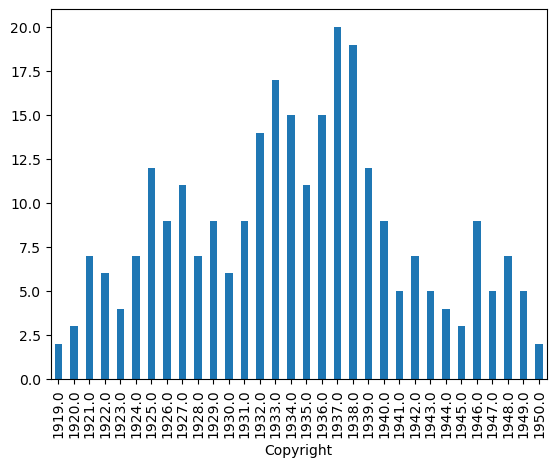

In [144]:
hraji[hraji["Hrají"] == "Jan W. Speerger (55928)"].groupby("Copyright")["Film"].nunique().plot.bar()

In [145]:
hraji[(~hraji["Datum narození"].isnull()) & hraji["Datum úmrtí"].isnull()].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Jan Kuželka (1445)            115
Jiří Lábus (838)              101
Jan Přeučil (4990)             93
Karel Hábl (27177)             92
Jan Kraus (1062)               84
Jiří Krampol (4985)            83
Oldřich Vlach (14387)          78
Ondřej Vetchý (836)            77
Jiřina Bohdalová (2878)        76
Jitka Zelenohorská (34821)     74
Name: Film, dtype: int64

In [146]:
herectvo = herectvo.merge(df[["Film","Copyright"]], on="Film")

In [147]:
aktivniherectvo = pd.DataFrame(hraji[(~hraji["Datum narození"].isnull()) & hraji["Datum úmrtí"].isnull()].groupby("Hrají")["Film"].nunique().nlargest(10))
aktivniherectvo["Jméno"] = aktivniherectvo.index
aktivniherectvo["Počet filmů"] = aktivniherectvo["Film"]
aktivniherectvo = aktivniherectvo.drop(columns="Film")
aktivniherectvo

,Jméno,Počet filmů
Hrají,,
Jan Kuželka (1445),Jan Kuželka (1445),115
Jiří Lábus (838),Jiří Lábus (838),101
Jan Přeučil (4990),Jan Přeučil (4990),93
Karel Hábl (27177),Karel Hábl (27177),92
Jan Kraus (1062),Jan Kraus (1062),84
Jiří Krampol (4985),Jiří Krampol (4985),83
Oldřich Vlach (14387),Oldřich Vlach (14387),78
Ondřej Vetchý (836),Ondřej Vetchý (836),77
Jiřina Bohdalová (2878),Jiřina Bohdalová (2878),76


In [148]:
debuty = {}
for a in aktivniherectvo.index:
    prvnirok = hraji[hraji["Hrají"] == a]["Copyright"].min()
    prvnifilmy = hraji[(hraji["Hrají"] == a) & (hraji["Copyright"] == prvnirok)]["Film"].drop_duplicates().to_list() 
    prvnifilmy = ", ".join([p.split(" (")[0] for p in prvnifilmy])
    debuty[a] = f"""{prvnifilmy} ({int(prvnirok)})"""
debuty = pd.DataFrame.from_dict(debuty, orient="index").rename(columns={0: "První film(y)"})
debuty["Jméno"] = debuty.index

In [149]:
aktivniherectvo = aktivniherectvo.merge(debuty, on="Jméno")
aktivniherectvo["Jméno"] = aktivniherectvo["Jméno"].apply(lambda x: x.split(" (")[0])

In [150]:
aktivniherectvo

,Jméno,Počet filmů,První film(y)
0,Jan Kuželka,115,"Půlnoční kolona, Klíč pod rohožkou, Pan Tau v ..."
1,Jiří Lábus,101,Rodeo (1972)
2,Jan Přeučil,93,"Hry a sny, Smrt v sedle (1958)"
3,Karel Hábl,92,Osení (1960)
4,Jan Kraus,84,Káťa a krokodýl (1965)
5,Jiří Krampol,83,Tři přání (1958)
6,Oldřich Vlach,78,Bez svatozáře (1963)
7,Ondřej Vetchý,77,"Leť, ptáku leť! (1978)"
8,Jiřina Bohdalová,76,Pižla a Žižla na cestách (1937)
9,Jitka Zelenohorská,74,Červnové dny (1961)


In [151]:
tabulka(aktivniherectvo, titulek="Nejaktivnější stále žijící herci a herečky", bez_zavorek=False)

<table class="dataframe table table--responsive table--w100p table--striped-red table--plain"><caption>Nejaktivnější stále žijící herci a herečky</caption><thead><tr style="text-align: right;"><th class="text-nowrap">Jméno</th><th class="text-nowrap">Počet filmů</th><th class="text-nowrap">První film(y)</th></tr></thead><tbody class="text-sm"><tr><td>Jan Kuželka</td><td>115</td><td>Půlnoční kolona, Klíč pod rohožkou, Pan Tau v cirkusu, Akce Bororo (1972)</td></tr><tr><td>Jiří Lábus</td><td>101</td><td>Rodeo (1972)</td></tr><tr><td>Jan Přeučil</td><td>93</td><td>Hry a sny, Smrt v sedle (1958)</td></tr><tr><td>Karel Hábl</td><td>92</td><td>Osení (1960)</td></tr><tr><td>Jan Kraus</td><td>84</td><td>Káťa a krokodýl (1965)</td></tr><tr><td>Jiří Krampol</td><td>83</td><td>Tři přání (1958)</td></tr><tr><td>Oldřich Vlach</td><td>78</td><td>Bez svatozáře (1963)</td></tr><tr><td>Ondřej Vetchý</td><td>77</td><td>Leť, ptáku leť! (1978)</td></tr><tr><td>Jiřina Bohdalová</td><td>76</td><td>Pižla a Ž

In [152]:
debuty

,První film(y),Jméno
Jan Kuželka (1445),"Půlnoční kolona, Klíč pod rohožkou, Pan Tau v ...",Jan Kuželka (1445)
Jiří Lábus (838),Rodeo (1972),Jiří Lábus (838)
Jan Přeučil (4990),"Hry a sny, Smrt v sedle (1958)",Jan Přeučil (4990)
Karel Hábl (27177),Osení (1960),Karel Hábl (27177)
Jan Kraus (1062),Káťa a krokodýl (1965),Jan Kraus (1062)
Jiří Krampol (4985),Tři přání (1958),Jiří Krampol (4985)
Oldřich Vlach (14387),Bez svatozáře (1963),Oldřich Vlach (14387)
Ondřej Vetchý (836),"Leť, ptáku leť! (1978)",Ondřej Vetchý (836)
Jiřina Bohdalová (2878),Pižla a Žižla na cestách (1937),Jiřina Bohdalová (2878)
Jitka Zelenohorská (34821),Červnové dny (1961),Jitka Zelenohorská (34821)


In [153]:
hraji[hraji["Hrají"].isin(aktivniherectvo.index)].groupby("Hrají")["Copyright"].min()

Series([], Name: Copyright, dtype: float64)

In [154]:
hraji[hraji["Hrají"] == "Jiřina Bohdalová (2878)"][["Copyright","Film","Věk"]].sort_values(by="Copyright").head(10)

,Copyright,Film,Věk
44995,1937.0,Pižla a Žižla na cestách (395752),6.0
44996,1939.0,Zlatý člověk (395859),8.0
44997,1940.0,Madla zpívá Evropě (395922),9.0
44998,1940.0,Dceruška k pohledání (395926),9.0
44999,1940.0,Babička (395928),9.0
45000,1947.0,Muzikant (396045),16.0
45001,1952.0,Únos (396149),21.0
45002,1955.0,Něco se tu změnilo (396202),24.0
45003,1955.0,Direktiva (396228),24.0
45008,1956.0,Vina Vladimíra Olmera (396248),25.0


## Kuželka

In [155]:
kuzelka = hraji[hraji["Hrají"] == "Jan Kuželka (1445)"]["Film"].drop_duplicates().to_list()
kuzelka = df[df["Film"].isin(kuzelka)]
kuzelka = kuzelka.explode("Režie")
kuzelka.groupby("Režie")["Film"].nunique().nlargest()

Režie
Václav Vorlíček (1044)    11
Antonín Kachlík (7880)     9
Otakar Fuka (1985)         7
Zdeněk Troška (3874)       6
Ivo Toman (8626)           5
Name: Film, dtype: int64

## Další rekordy

In [156]:
hraji[hraji["Věk"] <= 18].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Vladimír Salač (126323)        21
Vladimír Bejval (15695)        17
Vladimír Zátka (128952)        16
Filip Renč (558)               15
Josef Kemr (4897)              14
Michael Hofbauer (13613)       14
Josef Filip (127149)           13
Zuzana Ondrouchová (126513)    13
Andrea Čunderlíková (14417)    12
Jan Kraus (1062)               12
Name: Film, dtype: int64

In [157]:
hraji[hraji["Věk"] <= 12].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Vladimír Zátka (128952)    12
Jan Kreidl (128115)        10
Josef Filip (127149)       10
Tomáš Holý (27091)         10
Vladimír Bejval (15695)    10
Dagmar Appelová (28474)     9
Hanuš Bor (7070)            9
Lukáš Bech (23548)          9
Marta Fričová (127372)      9
Michal Koblic (128743)      9
Name: Film, dtype: int64

In [158]:
hraji[hraji["Věk"] >= 67].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Josef Střecha (55613)        68
Vlastimila Vlková (27109)    55
Alois Dvorský (127491)       47
Josef Oliak (128024)         40
Antonín Soukup (87404)       37
Marie Rosůlková (4751)       36
Vladimír Hlavatý (34999)     36
Josef Příhoda (128694)       35
Slávka Hamouzová (84688)     34
Bohdan Lachman (128508)      32
Name: Film, dtype: int64

In [159]:
hraji[hraji["Věk"] >= 80].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Josefa Pechlátová (126344)    15
Marie Rosůlková (4751)        12
František Kovářík (126912)    11
Antonín Soukup (87404)        10
Stanislav Zindulka (835)      10
Vlastimila Vlková (27109)     10
Jan Skopeček (8252)            9
Lubomír Lipský (9728)          9
Alois Dvorský (127491)         8
Antonín Zacpal (27111)         8
Name: Film, dtype: int64

## Kolegové

In [160]:
df["Spoluherectvo"] = df["Film"].map(df.groupby("Film")["Hrají"].agg(list))

In [161]:
def kolegove(jmeno):
    kolegove = df[df["Hrají"] == jmeno]["Spoluherectvo"].to_list()
    kolegove2 = [item for kolegove in kolegove for item in kolegove]
    kolegove = []
    for k in kolegove2:
        if k not in kolegove:
            kolegove.append(k)
    return(kolegove)

In [162]:
len(kolegove("Jiřina Bohdalová (2878)"))

1796

### Hledání nejstarší kolegyně Jiřiny Bohdalové

In [163]:
kolegove("Jiřina Bohdalová (2878)")

['Jarka Pižla (128001)',
 'Ferda Žižla',
 'Jiřina Bohdalová (2878)',
 'Otomar Korbelář (126899)',
 'Hana Vítová (126418)',
 'Zita Kabátová (839)',
 'Raoul Schránil (5103)',
 'Bohuš Záhorský (53346)',
 'Karel Černý (129779)',
 'Marie Pilská (127876)',
 'Fanča Foltová (127662)',
 'Marie Přikrylová (126525)',
 'Slávka Rosenbergová (127517)',
 'Marie Vildová (127782)',
 'Elsa Vetešníková (76321)',
 'Karel Veverka (126788)',
 'Vojta Merten (129807)',
 'Dagmar Vondrová (130165)',
 'Antonín Zacpal (27111)',
 'Nina Strnadová-Jarková (130000)',
 'Václav Pata (32026)',
 'Antonín Frič (127707)',
 'Rudolfína Schránilová (130181)',
 'Marie Geblerová (8221)',
 'Marie Hrdličková (130161)',
 'Jaroslava Vacková (130201)',
 'Růžena Kurelová (130454)',
 'Zdenka Sulanová (22526)',
 'Ladislav Boháč (127074)',
 'Jaroslav Průcha (127342)',
 'Antonie Nedošinská (127295)',
 'František Kreuzmann (75624)',
 'Jiří Dohnal (126022)',
 'František Filipovský (4735)',
 'Zvonimir Rogoz (127538)',
 'R. A. Dvorský (17596

In [192]:
persony[persony['Jméno'].isin(kolegove("Jiřina Bohdalová (2878)"))].sort_values(by='Rok narození').head(10)

,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí
8431,Karolína Vávrová (130338),130338,herečka,fyzická,Filipina Karolina Josefa Terezie Kaurová (rodn...,None,1869-08-02T00:00:00.000,"Praha, Rakousko-Uhersko",1951-10-06T00:00:00.000,"Praha, Československo",Praha,Rakousko-Uhersko,Praha,Československo,1869.0,1951.0
6067,Josef Oliak (128024),128024,herec,fyzická,None,None,1870-11-05T00:00:00.000,"Praha, Rakousko-Uhersko",1953-11-03T00:00:00.000,"Praha, Československo",Praha,Rakousko-Uhersko,Praha,Československo,1870.0,1953.0
4791,Karel Veverka (126788),126788,"herec, operní zpěvák, ředitel, divadelní podni...",fyzická,Karel Boromějský Jan Veverka (rodné jméno),None,1871-09-07T00:00:00.000,"Praha, Rakousko-Uhersko",1945-06-25T00:00:00.000,"Plzeň, Československo",Praha,Rakousko-Uhersko,Plzeň,Československo,1871.0,1945.0
15076,Filip Balek-Brodský (28800),28800,"herec, dramatik, spisovatel, organizační praco...",fyzická,"Filip Jakub Ballek (rodné jméno), Filip Bálek-...",None,1871-09-17T00:00:00.000,"Havlíčkův Brod, Rakousko-Uhersko",1949-10-30T00:00:00.000,"Praha, Československo",Havlíčkův Brod,Rakousko-Uhersko,Praha,Československo,1871.0,1949.0
7828,Antonín Šolc (129715),129715,herec,fyzická,None,None,1871-10-14T00:00:00.000,"České Meziříčí, Rakousko-Uhersko",1948-02-22T00:00:00.000,"Praha, Československo",České Meziříčí,Rakousko-Uhersko,Praha,Československo,1871.0,1948.0
5766,František Hlavatý (127717),127717,"scenárista, herec, dramatik, režisér",fyzická,R. Harras (pseudonym),None,1873-03-01T00:00:00.000,"Žiželoves u Dvora Králové nad Labem, Rakousko-...",1952-01-05T00:00:00.000,"Praha, Československo",Žiželoves u Dvora Králové nad Labem,Rakousko-Uhersko,Praha,Československo,1873.0,1952.0
5073,Terezie Brzková (127051),127051,herečka,fyzická,"Terezie Jelínková (rodné jméno), Terezie Brzko...",None,1875-01-11T00:00:00.000,"Kolín, Rakousko-Uhersko",1966-11-19T00:00:00.000,"Praha, Československo",Kolín,Rakousko-Uhersko,Praha,Československo,1875.0,1966.0
3619,Marie Oliaková (124867),124867,herečka,fyzická,"Marie Kavková (rodné jméno), Marie Kafková, Ma...",None,1876-06-09T00:00:00.000,"Sýkořice u Berouna, Rakousko-Uhersko",1942-09-16T00:00:00.000,"Praha, Československo",Sýkořice u Berouna,Rakousko-Uhersko,Praha,Československo,1876.0,1942.0
5863,Vladimír Smíchovský (127807),127807,herec,fyzická,Vladimír Kocourek (rodné jméno),None,1876-05-22T00:00:00.000,"Praha, Rakousko-Uhersko",1943-02-02T00:00:00.000,"Praha, Československo",Praha,Rakousko-Uhersko,Praha,Československo,1876.0,1943.0
5765,Jan Černý (127716),127716,herec,fyzická,None,None,1878-02-21T00:00:00.000,"Sadská u Poděbrad, Rakousko-Uhersko",1944-03-03T00:00:00.000,"Praha, Československo",Sadská u Poděbrad,Rakousko-Uhersko,Praha,Československo,1878.0,1944.0


In [197]:
bohdalcinyfilmy = df[df['Hrají'] == 'Jiřina Bohdalová (2878)']['Film'].drop_duplicates()

In [202]:
spolusbohdalkou = df[df['Film'].isin(bohdalcinyfilmy)]['Hrají'].drop_duplicates().to_list()

In [204]:
persony[persony['Jméno'].isin(spolusbohdalkou)].sort_values(by="Rok narození")

,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí
8431,Karolína Vávrová (130338),130338,herečka,fyzická,Filipina Karolina Josefa Terezie Kaurová (rodn...,None,1869-08-02T00:00:00.000,"Praha, Rakousko-Uhersko",1951-10-06T00:00:00.000,"Praha, Československo",Praha,Rakousko-Uhersko,Praha,Československo,1869.0,1951.0
6067,Josef Oliak (128024),128024,herec,fyzická,None,None,1870-11-05T00:00:00.000,"Praha, Rakousko-Uhersko",1953-11-03T00:00:00.000,"Praha, Československo",Praha,Rakousko-Uhersko,Praha,Československo,1870.0,1953.0
4791,Karel Veverka (126788),126788,"herec, operní zpěvák, ředitel, divadelní podni...",fyzická,Karel Boromějský Jan Veverka (rodné jméno),None,1871-09-07T00:00:00.000,"Praha, Rakousko-Uhersko",1945-06-25T00:00:00.000,"Plzeň, Československo",Praha,Rakousko-Uhersko,Plzeň,Československo,1871.0,1945.0
15076,Filip Balek-Brodský (28800),28800,"herec, dramatik, spisovatel, organizační praco...",fyzická,"Filip Jakub Ballek (rodné jméno), Filip Bálek-...",None,1871-09-17T00:00:00.000,"Havlíčkův Brod, Rakousko-Uhersko",1949-10-30T00:00:00.000,"Praha, Československo",Havlíčkův Brod,Rakousko-Uhersko,Praha,Československo,1871.0,1949.0
7828,Antonín Šolc (129715),129715,herec,fyzická,None,None,1871-10-14T00:00:00.000,"České Meziříčí, Rakousko-Uhersko",1948-02-22T00:00:00.000,"Praha, Československo",České Meziříčí,Rakousko-Uhersko,Praha,Československo,1871.0,1948.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32426,Miroslav Hrdý (9090),9090,,fyzická,None,None,None,None,None,None,None,None,None,None,NaN,NaN
32435,Olympic (911),911,None,právnická,skupina Olympic (úplný název),None,None,None,None,None,None,None,None,None,NaN,NaN
32512,Pavel Kocanda (92263),92263,,fyzická,None,None,None,None,None,None,None,None,None,None,NaN,NaN
32609,Petr Kocanda (92509),92509,,fyzická,None,None,None,None,None,None,None,None,None,None,NaN,NaN


In [211]:
spolecnefilmy = [x for x in df[df['Hrají'] == "Jiřina Bohdalová (2878)"]['Film'].to_list() if x in df[df['Hrají'] == "Karolína Vávrová (130338)"]['Film'].to_list()]
df[df['Film'].isin(spolecnefilmy)][['Film','Copyright']].drop_duplicates()

,Film,Copyright
1215,Muzikant (396045),1947


### Postavy Jiřiny Bohdalové

In [217]:
herectvo2 = herectvo.explode('Role')

In [228]:
pd.set_option('display.max_rows', None)
herectvo2[herectvo2['Hraje'] == 'Jiřina Bohdalová (2878)'][['Film','Role','Copyright']].sort_values(by="Copyright").drop_duplicates()

,Film,Role,Copyright
804945,Pižla a Žižla na cestách (395752),holčička,1937
891628,Zlatý člověk (395859),dcerka zraněného dílovedoucího,1939
951499,Madla zpívá Evropě (395922),"Jiřinka, členka dětského pěveckého sboru",1940
954323,Dceruška k pohledání (395926),dítě,1940
957165,Babička (395928),dítě na dožínkách,1940
1094788,Muzikant (396045),děvče na taneční zábavě,1947
1225814,Únos (396149),tanečnice,1952
1295875,Něco se tu změnilo (396202),zdravotní sestra,1955
1332995,Direktiva (396228),delegátka festivalu,1955
1356201,Honzíkova cesta (396263),sekretářka televize,1956


In [227]:
pd.set_option('display.max_rows', 60)

In [223]:
role_bohdalove = herectvo2[herectvo2['Hraje'] == 'Jiřina Bohdalová (2878)'][['Film','Role','Copyright']].drop_duplicates()['Role'].to_list()
role_bohdalove.sort()
role_bohdalove

['Anička',
 'Anna, Ludvíkova žena',
 'Boženka, Rambouskova žena',
 'Božka',
 'Fany',
 'Helena Drozdová',
 'Helena Šmídová vlastním jménem Anna Housková',
 'Helena, Martina kolegyně',
 'Hermína, Prusíkova dcera',
 'Horákova žena',
 'Irma',
 'Jadwiga',
 'Jana',
 'Jiřinka',
 'Jiřinka, členka dětského pěveckého sboru',
 'Leontýna Boháčková',
 'Lída, Hudcova žena',
 'Mirkova a Vladimírova spolužačka',
 'Mánička, Holubova švagrová',
 'Ona',
 'Slávka Vokáčová, Karlova snoubenka',
 'Valerie Jírů',
 'Viktorie Chladová zvaná Viki',
 'Věra Řeháková zvaná Píšťalka',
 'Zuzana Vítová',
 'Závist',
 'bufetářka Klára Zárubecká',
 'dcerka zraněného dílovedoucího',
 'delegátka festivalu',
 'duše Voříšková',
 'dítě',
 'dítě na dožínkách',
 'dívka s kyticí',
 'dívka v průjezdu',
 'dívka v tramvaji',
 'děvče na taneční zábavě',
 'fotbalová rozhodčí Ema Petrů',
 'herečka a alkoholička Vendla',
 'holčička',
 'kadeřnice Lenka, Lojzova snoubenka',
 'klientka-laborantka Marcela Vojanová z Kladna',
 'kloboučnice 

## Červí díry

In [49]:
prvni = hraji["Copyright"].min()
posledni = [hraji["Copyright"].max(), hraji["Copyright"].max()-1]

In [50]:
prvni_herectvo = hraji[hraji["Copyright"] == prvni]["Hrají"].drop_duplicates().to_list()
prvni_herectvo

['Ferdinand Gýra (60351)',
 'Josef Šváb-Malostranský (55291)',
 'Marie Kříženecká (99776)',
 None]

In [51]:
posledni_herectvo = hraji[hraji["Copyright"].isin(posledni)]["Hrají"].drop_duplicates().to_list()
posledni_herectvo = [p for p in posledni_herectvo if p != "neuvedeno"]

In [52]:
cervi_diry = []
cervi_filmy = []
for n in vsechno_herectvo:
    if n:
        if "(" in n:
            spolu = kolegove(n)
            for x in prvni_herectvo:
                if x:
                    if "(" in x:
                        if x in spolu:
                            for y in posledni_herectvo:
                                if y:
                                    if "(" in y:
                                        if y in spolu:
                                            print(f"{n}, {x}, {y}")
                                            n_filmy = df[df["Hrají"] == n]["Film"].drop_duplicates().to_list()
                                            y_filmy = df[df["Hrají"] == y]["Film"].drop_duplicates().to_list()
                                            z_filmy = []
                                            for nf in n_filmy:
                                                if nf in y_filmy:
                                                    z_filmy.append(nf)
                                                    cervi_filmy.append(nf)
                                            cervi_diry.append(n)

Jarmila Kronbauerová (128121), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
Bedřich Vrbský (83528), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
František Kovářík (126912), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
František Kovářík (126912), Josef Šváb-Malostranský (55291), Ivana Chýlková (4684)
František Kovářík (126912), Josef Šváb-Malostranský (55291), Jan Kuželka (1445)
František Kovářík (126912), Josef Šváb-Malostranský (55291), Pavel Nový (510)
František Kovářík (126912), Josef Šváb-Malostranský (55291), Petr Jákl st. (3654)
František Kovářík (126912), Josef Šváb-Malostranský (55291), Rostislav Novák st. (40328)
František Kovářík (126912), Josef Šváb-Malostranský (55291), Taťjana Medvecká (7064)
Antonín Meisner (127732), Josef Šváb-Malostranský (55291), Jan Kuželka (1445)
Eman Fiala (64088), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
Eman Fiala (64088), Josef Šváb-Malostranský (55291), Taťjana Medvecká (7064)
L. H. Struna (126711), Josef 

In [53]:
cervi_diry

['Jarmila Kronbauerová (128121)',
 'Bedřich Vrbský (83528)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'Antonín Meisner (127732)',
 'Eman Fiala (64088)',
 'Eman Fiala (64088)',
 'L. H. Struna (126711)',
 'L. H. Struna (126711)',
 'L. H. Struna (126711)',
 'Marta Májová (127723)',
 'Gabriela Bártlová-Buddeusová (127814)',
 'Gabriela Bártlová-Buddeusová (127814)',
 'Gabriela Bártlová-Buddeusová (127814)',
 'Gabriela Bártlová-Buddeusová (127814)',
 'Václav Vydra ml. (126535)',
 'Vladimír Hlavatý (34999)',
 'Vladimír Hlavatý (34999)',
 'Vladimír Hlavatý (34999)',
 'Vladimír Hlavatý (34999)',
 'Vladimír Hlavatý (34999)',
 'Vladimír Hlavatý (34999)',
 'Vladimír Hlavatý (34999)',
 'Vladimír Hlavatý (34999)',
 'Vladimír Hlavatý (34999)',
 'Vladimír Hlavatý (34999)',
 'Vladimír Hlavatý (34999)',
 'Vladimír Hlavatý (34999)

In [54]:
cervi_diry_seznam = list(set(cervi_diry))

In [55]:
len(cervi_diry_seznam)

23

In [56]:
cervi_diry_statistiky = {}
for c in cervi_diry:
    cervi_diry_statistiky[c] = cervi_diry.count(c)
cervi_diry_statistiky = pd.DataFrame.from_dict(cervi_diry_statistiky, orient="index").rename(columns={0: "propojení"})
cervi_diry_statistiky.sort_values(by="propojení",ascending=False).head(10)

,propojení
Vladimír Hlavatý (34999),12
František Kovářík (126912),7
Ela Šárková (126039),5
Darja Hajská (35228),4
Gabriela Bártlová-Buddeusová (127814),4
Jára Kohout (4846),4
L. H. Struna (126711),3
Nataša Gollová (36491),2
Eman Fiala (64088),2
Jaroslav Marvan (9550),2


In [57]:
cervi_filmy_statistiky = {}
for c in cervi_filmy:
    cervi_filmy_statistiky[c] = cervi_filmy.count(c)
cervi_filmy_statistiky = pd.DataFrame.from_dict(cervi_filmy_statistiky, orient="index").rename(columns={0: "propojení"})
cervi_filmy_statistiky.sort_values(by="propojení",ascending=False).head(10)

,propojení
Čintamani & podvodník (396606),4
Handlíři (396548),4
Přátelé bermudského trojúhelníku (397557),4
"„Marečku, podejte mi pero!“ (397112)",4
Láska z pasáže (397462),3
Velká filmová loupež (397520),3
Zralé víno (397335),3
Smrt na černo (397105),3
Není sirotek jako sirotek (397513),3
Honza málem králem (397135),2


In [58]:
cervi_diry_ciste = []
for c in cervi_diry_seznam:
    c = c.split(" (")[0]
    cervi_diry_ciste.append(c)

In [59]:
for d in cervi_diry_ciste:
    print(f"""{{ id: '{d}', name: '{d}', category: 'Category B' }},""")

{ id: 'Václav Vydra ml.', name: 'Václav Vydra ml.', category: 'Category B' },
{ id: 'Alois Dvorský', name: 'Alois Dvorský', category: 'Category B' },
{ id: 'Jaroslav Marvan', name: 'Jaroslav Marvan', category: 'Category B' },
{ id: 'Darja Hajská', name: 'Darja Hajská', category: 'Category B' },
{ id: 'Ela Šárková', name: 'Ela Šárková', category: 'Category B' },
{ id: 'Josef Steigl', name: 'Josef Steigl', category: 'Category B' },
{ id: 'Bedřich Vrbský', name: 'Bedřich Vrbský', category: 'Category B' },
{ id: 'Jarmila Kronbauerová', name: 'Jarmila Kronbauerová', category: 'Category B' },
{ id: 'Marta Májová', name: 'Marta Májová', category: 'Category B' },
{ id: 'František Kovářík', name: 'František Kovářík', category: 'Category B' },
{ id: 'Gabriela Bártlová-Buddeusová', name: 'Gabriela Bártlová-Buddeusová', category: 'Category B' },
{ id: 'Vladimír Hlavatý', name: 'Vladimír Hlavatý', category: 'Category B' },
{ id: 'Eman Fiala', name: 'Eman Fiala', category: 'Category B' },
{ id: 'Vác

In [60]:
cervi_diry_ciste

['Václav Vydra ml.',
 'Alois Dvorský',
 'Jaroslav Marvan',
 'Darja Hajská',
 'Ela Šárková',
 'Josef Steigl',
 'Bedřich Vrbský',
 'Jarmila Kronbauerová',
 'Marta Májová',
 'František Kovářík',
 'Gabriela Bártlová-Buddeusová',
 'Vladimír Hlavatý',
 'Eman Fiala',
 'Václav Wasserman',
 'Zdeněk Štěpánek',
 'L. H. Struna',
 'Světla Svozilová',
 'Antonín Meisner',
 'Ela Poznerová',
 'Frank Argus',
 'Nataša Gollová',
 'Slávka Doležalová-Kulhavá',
 'Jára Kohout']

In [61]:
hraji[hraji["Hrají"].isin(cervi_diry)].groupby("Copyright")["Rok úmrtí"].max().sort_values()

Copyright
1916.0    1966.0
1918.0    1975.0
1924.0    1975.0
1919.0    1980.0
1920.0    1980.0
           ...  
1944.0    1994.0
1947.0    1994.0
1994.0    1994.0
1934.0    1994.0
1995.0    1994.0
Name: Rok úmrtí, Length: 76, dtype: float64

### Opačný směr – pro ČRo

In [62]:
zijici_propojovatele = {}
for p in posledni_herectvo:
    kolegacci = kolegove(p)
    cervouni = []
    for k in kolegacci:
        if k in cervi_diry_seznam:
            cervouni.append(k)
    if cervouni:
        zijici_propojovatele[p] = cervouni
zijici_propojovatele

{'Boleslav Polívka (1556)': ['Vladimír Hlavatý (34999)'],
 'Iva Janžurová (1049)': ['Darja Hajská (35228)',
  'Eman Fiala (64088)',
  'L. H. Struna (126711)',
  'Josef Steigl (128760)',
  'Marta Májová (127723)',
  'Gabriela Bártlová-Buddeusová (127814)',
  'Jarmila Kronbauerová (128121)',
  'Světla Svozilová (126470)',
  'Jaroslav Marvan (9550)',
  'Bedřich Vrbský (83528)',
  'Frank Argus (28475)',
  'Slávka Doležalová-Kulhavá (84685)',
  'Zdeněk Štěpánek (87457)',
  'Vladimír Hlavatý (34999)',
  'Václav Vydra ml. (126535)',
  'Nataša Gollová (36491)',
  'František Kovářík (126912)',
  'Ela Poznerová (126572)'],
 'Ivana Chýlková (4684)': ['František Kovářík (126912)',
  'Ela Šárková (126039)'],
 'Jan Blažek': ['Jaroslav Marvan (9550)'],
 'Jan Kuželka (1445)': ['Darja Hajská (35228)',
  'L. H. Struna (126711)',
  'Antonín Meisner (127732)',
  'Vladimír Hlavatý (34999)',
  'Gabriela Bártlová-Buddeusová (127814)',
  'Ela Šárková (126039)',
  'František Kovářík (126912)',
  'Nataša Gollov

In [63]:
for key, value in zijici_propojovatele.items():
    print(f"""{{ id: '{key.split(" (")[0]}', name: '{key.split(" (")[0]}', category: 'Category C' }},""")

{ id: 'Boleslav Polívka', name: 'Boleslav Polívka', category: 'Category C' },
{ id: 'Iva Janžurová', name: 'Iva Janžurová', category: 'Category C' },
{ id: 'Ivana Chýlková', name: 'Ivana Chýlková', category: 'Category C' },
{ id: 'Jan Blažek', name: 'Jan Blažek', category: 'Category C' },
{ id: 'Jan Kuželka', name: 'Jan Kuželka', category: 'Category C' },
{ id: 'Jana Nagyová', name: 'Jana Nagyová', category: 'Category C' },
{ id: 'Jiří Langmajer', name: 'Jiří Langmajer', category: 'Category C' },
{ id: 'Jiří Lábus', name: 'Jiří Lábus', category: 'Category C' },
{ id: 'Jiří Novák', name: 'Jiří Novák', category: 'Category C' },
{ id: 'Marek Vašut', name: 'Marek Vašut', category: 'Category C' },
{ id: 'Martin Hub', name: 'Martin Hub', category: 'Category C' },
{ id: 'Ondřej Pavelka', name: 'Ondřej Pavelka', category: 'Category C' },
{ id: 'Ondřej Vetchý', name: 'Ondřej Vetchý', category: 'Category C' },
{ id: 'Pavel Nový', name: 'Pavel Nový', category: 'Category C' },
{ id: 'Petr Jákl st.

In [64]:
data_pro_graf = []
for c in cervi_diry_seznam:
    data_pro_graf.append(["Josef Šváb-Malostranský",c.split(" (")[0]])
for key, value in zijici_propojovatele.items():
    for v in value:
        data_pro_graf.append([v.split(" (")[0], key.split(" (")[0]])
for key, value in zijici_propojovatele.items():
    for v in value:
        print(f"""{{ from: '{v.split(" (")[0]}', to: '{key.split(" (")[0]}' }},""")

{ from: 'Vladimír Hlavatý', to: 'Boleslav Polívka' },
{ from: 'Darja Hajská', to: 'Iva Janžurová' },
{ from: 'Eman Fiala', to: 'Iva Janžurová' },
{ from: 'L. H. Struna', to: 'Iva Janžurová' },
{ from: 'Josef Steigl', to: 'Iva Janžurová' },
{ from: 'Marta Májová', to: 'Iva Janžurová' },
{ from: 'Gabriela Bártlová-Buddeusová', to: 'Iva Janžurová' },
{ from: 'Jarmila Kronbauerová', to: 'Iva Janžurová' },
{ from: 'Světla Svozilová', to: 'Iva Janžurová' },
{ from: 'Jaroslav Marvan', to: 'Iva Janžurová' },
{ from: 'Bedřich Vrbský', to: 'Iva Janžurová' },
{ from: 'Frank Argus', to: 'Iva Janžurová' },
{ from: 'Slávka Doležalová-Kulhavá', to: 'Iva Janžurová' },
{ from: 'Zdeněk Štěpánek', to: 'Iva Janžurová' },
{ from: 'Vladimír Hlavatý', to: 'Iva Janžurová' },
{ from: 'Václav Vydra ml.', to: 'Iva Janžurová' },
{ from: 'Nataša Gollová', to: 'Iva Janžurová' },
{ from: 'František Kovářík', to: 'Iva Janžurová' },
{ from: 'Ela Poznerová', to: 'Iva Janžurová' },
{ from: 'František Kovářík', to: 'Ivan

In [65]:
for c in cervi_diry_ciste:
    print(f"""{{ from: 'Josef Šváb-Malostranský', to: '{c}' }},""")

{ from: 'Josef Šváb-Malostranský', to: 'Václav Vydra ml.' },
{ from: 'Josef Šváb-Malostranský', to: 'Alois Dvorský' },
{ from: 'Josef Šváb-Malostranský', to: 'Jaroslav Marvan' },
{ from: 'Josef Šváb-Malostranský', to: 'Darja Hajská' },
{ from: 'Josef Šváb-Malostranský', to: 'Ela Šárková' },
{ from: 'Josef Šváb-Malostranský', to: 'Josef Steigl' },
{ from: 'Josef Šváb-Malostranský', to: 'Bedřich Vrbský' },
{ from: 'Josef Šváb-Malostranský', to: 'Jarmila Kronbauerová' },
{ from: 'Josef Šváb-Malostranský', to: 'Marta Májová' },
{ from: 'Josef Šváb-Malostranský', to: 'František Kovářík' },
{ from: 'Josef Šváb-Malostranský', to: 'Gabriela Bártlová-Buddeusová' },
{ from: 'Josef Šváb-Malostranský', to: 'Vladimír Hlavatý' },
{ from: 'Josef Šváb-Malostranský', to: 'Eman Fiala' },
{ from: 'Josef Šváb-Malostranský', to: 'Václav Wasserman' },
{ from: 'Josef Šváb-Malostranský', to: 'Zdeněk Štěpánek' },
{ from: 'Josef Šváb-Malostranský', to: 'L. H. Struna' },
{ from: 'Josef Šváb-Malostranský', to: 'S

In [66]:
len(zijici_propojovatele)

20

In [67]:
zijici_propojovatele

{'Boleslav Polívka (1556)': ['Vladimír Hlavatý (34999)'],
 'Iva Janžurová (1049)': ['Darja Hajská (35228)',
  'Eman Fiala (64088)',
  'L. H. Struna (126711)',
  'Josef Steigl (128760)',
  'Marta Májová (127723)',
  'Gabriela Bártlová-Buddeusová (127814)',
  'Jarmila Kronbauerová (128121)',
  'Světla Svozilová (126470)',
  'Jaroslav Marvan (9550)',
  'Bedřich Vrbský (83528)',
  'Frank Argus (28475)',
  'Slávka Doležalová-Kulhavá (84685)',
  'Zdeněk Štěpánek (87457)',
  'Vladimír Hlavatý (34999)',
  'Václav Vydra ml. (126535)',
  'Nataša Gollová (36491)',
  'František Kovářík (126912)',
  'Ela Poznerová (126572)'],
 'Ivana Chýlková (4684)': ['František Kovářík (126912)',
  'Ela Šárková (126039)'],
 'Jan Blažek': ['Jaroslav Marvan (9550)'],
 'Jan Kuželka (1445)': ['Darja Hajská (35228)',
  'L. H. Struna (126711)',
  'Antonín Meisner (127732)',
  'Vladimír Hlavatý (34999)',
  'Gabriela Bártlová-Buddeusová (127814)',
  'Ela Šárková (126039)',
  'František Kovářík (126912)',
  'Nataša Gollov

In [68]:
treti =[]
for key, value in zijici_propojovatele.items():
    treti.append(key.split(" (")[0])
treti

['Boleslav Polívka',
 'Iva Janžurová',
 'Ivana Chýlková',
 'Jan Blažek',
 'Jan Kuželka',
 'Jana Nagyová',
 'Jiří Langmajer',
 'Jiří Lábus',
 'Jiří Novák',
 'Marek Vašut',
 'Martin Hub',
 'Ondřej Pavelka',
 'Ondřej Vetchý',
 'Pavel Nový',
 'Petr Jákl st.',
 'Rostislav Novák st.',
 'Taťjana Medvecká',
 'Uršula Kluková',
 'Vladislav Beneš',
 'Václav Černý']

In [69]:
for key, value in zijici_propojovatele.items():
    
    print(key)
    
    filmy_soucasneho_herce = hraji[hraji["Hrají"] == key]["Film"].drop_duplicates().to_list()
    
    for v in value: 
        filmy_stareho_herce = hraji[hraji["Hrají"] == v]["Film"].drop_duplicates().to_list()
        spolecne_se_starym = [x for x in filmy_stareho_herce if x in filmy_soucasneho_herce]
        spolecne_s_jsm = [x for x in filmy_stareho_herce if x in jsm]
        print(f"""hrál(a) s {v} ve filmu/filmech {(", ").join(spolecne_se_starym)}, a {v} hrál(a) ve filmu/filmech s {(", ").join(spolecne_s_jsm)} s Josefem Švábem Malostranským""")
            
    print("****")

Boleslav Polívka (1556)
hrál(a) s Vladimír Hlavatý (34999) ve filmu/filmech Šašek a královna (397555), a Vladimír Hlavatý (34999) hrál(a) ve filmu/filmech s Chudá holka (395466) s Josefem Švábem Malostranským
****
Iva Janžurová (1049)
hrál(a) s Darja Hajská (35228) ve filmu/filmech Spadla s měsíce (396439), Světáci (396816), Ďábelské líbánky (396879), Hodíme se k sobě, miláčku...? (397038), „Marečku, podejte mi pero!“ (397112), Zítra to roztočíme, drahoušku...! (397104), „Já to tedy beru, šéfe...!“ (397161), a Darja Hajská (35228) hrál(a) ve filmu/filmech s Kedlubnový kavalír (395438), Z českých mlýnů (395494), Kariéra Pavla Čamrdy (395542), Pepina Rejholcová (395568), Kantor Ideál (395574) s Josefem Švábem Malostranským
hrál(a) s Eman Fiala (64088) ve filmu/filmech Hledá se táta! (396457), Handlíři (396548), a Eman Fiala (64088) hrál(a) ve filmu/filmech s Komptoiristka (395285), Jejich svatební noc (395283), Venoušek a Stázička (395308), Tu ten kámen (395326), Únos bankéře Fuxe (39532

hrál(a) s Gabriela Bártlová-Buddeusová (127814) ve filmu/filmech Smrt na černo (397105), a Gabriela Bártlová-Buddeusová (127814) hrál(a) ve filmu/filmech s Dejte se omladit (395279), Venoušek a Stázička (395308), Mrtví žijí (395292) s Josefem Švábem Malostranským
hrál(a) s Darja Hajská (35228) ve filmu/filmech Julek (397243), a Darja Hajská (35228) hrál(a) ve filmu/filmech s Kedlubnový kavalír (395438), Z českých mlýnů (395494), Kariéra Pavla Čamrdy (395542), Pepina Rejholcová (395568), Kantor Ideál (395574) s Josefem Švábem Malostranským
hrál(a) s Ela Šárková (126039) ve filmu/filmech Hodinářova svatební cesta korálovým mořem (397250), ...a zase ta Lucie! (397427), a Ela Šárková (126039) hrál(a) ve filmu/filmech s Pepina Rejholcová (395568) s Josefem Švábem Malostranským
hrál(a) s Vladimír Hlavatý (34999) ve filmu/filmech Zralé víno (397335), Srdečný pozdrav ze zeměkoule (397365), Velká filmová loupež (397520), a Vladimír Hlavatý (34999) hrál(a) ve filmu/filmech s Chudá holka (395466)

### Finál graf

In [70]:
hraji = df.explode(["Hrají"])

In [71]:
filmy_jsm = hraji[hraji["Hrají"] == "Josef Šváb-Malostranský (55291)"]["Film"].drop_duplicates().to_list()
filmy_jsm

['Smích a pláč (395110)',
 'Výstavní párkař a lepič plakátů (395111)',
 'Dostaveníčko ve mlýnici (395109)',
 'Pět smyslů člověka (395134)',
 'Zlaté srdéčko (395153)',
 'Polykarp aprovisuje (395154)',
 'Čertisko (395159)',
 'Sen frátera Ondřeje (395173)',
 'Princezna z chalupy (395172)',
 'Záhadný případ (395211)',
 'Evin hřích (395187)',
 'Bogra (395182)',
 'Byl první máj (395183)',
 'Rabbi Löw (395201)',
 'Zpěv zlata (395234)',
 'Setřelé písmo (395235)',
 'Nikyho velebné dobrodružství (395223)',
 'Dráteníček (395216)',
 'Otrávené světlo (395258)',
 'Příchozí z temnot (395261)',
 'Roztržené foto (395264)',
 'Stíny (395269)',
 'Živé mrtvoly (395274)',
 'Cikáni (395239)',
 'Irčin románek II. (395246)',
 'Košile šťastného člověka (395249)',
 'Kříž u potoka (395250)',
 'Manželé paní Mileny (395251)',
 'Likérová princeznička (395289)',
 'Láska slečny Věry (395288)',
 'Komptoiristka (395285)',
 'Jejich svatební noc (395283)',
 'Dejte se omladit (395279)',
 'Adam a Eva (395275)',
 'Drvoštěp (

In [72]:
final_graf_data = []

In [73]:
for c in cervi_diry_seznam:
    spolecne = len(hraji[(hraji["Hrají"] == c) & (hraji["Film"].isin(filmy_jsm))])
    print(f"""["Josef Šváb-Malostranský", "{c.split(" (")[0]}", {spolecne}],""")
    final_graf_data.append(["Josef Šváb-Malostranský", c.split(" (")[0], int(spolecne)])

["Josef Šváb-Malostranský", "Václav Vydra ml.", 1],
["Josef Šváb-Malostranský", "Alois Dvorský", 5],
["Josef Šváb-Malostranský", "Jaroslav Marvan", 8],
["Josef Šváb-Malostranský", "Darja Hajská", 5],
["Josef Šváb-Malostranský", "Ela Šárková", 1],
["Josef Šváb-Malostranský", "Josef Steigl", 1],
["Josef Šváb-Malostranský", "Bedřich Vrbský", 1],
["Josef Šváb-Malostranský", "Jarmila Kronbauerová", 1],
["Josef Šváb-Malostranský", "Marta Májová", 2],
["Josef Šváb-Malostranský", "František Kovářík", 1],
["Josef Šváb-Malostranský", "Gabriela Bártlová-Buddeusová", 3],
["Josef Šváb-Malostranský", "Vladimír Hlavatý", 1],
["Josef Šváb-Malostranský", "Eman Fiala", 11],
["Josef Šváb-Malostranský", "Václav Wasserman", 1],
["Josef Šváb-Malostranský", "Zdeněk Štěpánek", 1],
["Josef Šváb-Malostranský", "L. H. Struna", 10],
["Josef Šváb-Malostranský", "Světla Svozilová", 1],
["Josef Šváb-Malostranský", "Antonín Meisner", 1],
["Josef Šváb-Malostranský", "Ela Poznerová", 1],
["Josef Šváb-Malostranský", "Fr

In [74]:
final_graf_data

[['Josef Šváb-Malostranský', 'Václav Vydra ml.', 1],
 ['Josef Šváb-Malostranský', 'Alois Dvorský', 5],
 ['Josef Šváb-Malostranský', 'Jaroslav Marvan', 8],
 ['Josef Šváb-Malostranský', 'Darja Hajská', 5],
 ['Josef Šváb-Malostranský', 'Ela Šárková', 1],
 ['Josef Šváb-Malostranský', 'Josef Steigl', 1],
 ['Josef Šváb-Malostranský', 'Bedřich Vrbský', 1],
 ['Josef Šváb-Malostranský', 'Jarmila Kronbauerová', 1],
 ['Josef Šváb-Malostranský', 'Marta Májová', 2],
 ['Josef Šváb-Malostranský', 'František Kovářík', 1],
 ['Josef Šváb-Malostranský', 'Gabriela Bártlová-Buddeusová', 3],
 ['Josef Šváb-Malostranský', 'Vladimír Hlavatý', 1],
 ['Josef Šváb-Malostranský', 'Eman Fiala', 11],
 ['Josef Šváb-Malostranský', 'Václav Wasserman', 1],
 ['Josef Šváb-Malostranský', 'Zdeněk Štěpánek', 1],
 ['Josef Šváb-Malostranský', 'L. H. Struna', 10],
 ['Josef Šváb-Malostranský', 'Světla Svozilová', 1],
 ['Josef Šváb-Malostranský', 'Antonín Meisner', 1],
 ['Josef Šváb-Malostranský', 'Ela Poznerová', 1],
 ['Josef Švá

In [75]:
for c in cervi_diry_seznam:
    for key, value  in zijici_propojovatele.items():
        p_filmy = hraji[hraji["Hrají"] == key]["Film"].drop_duplicates().to_list()
        spolecne = hraji[(hraji["Hrají"] == c) & (hraji["Film"].isin(p_filmy))]
        spolecne = len(spolecne)
        if spolecne > 0:
            print(f"""["{c.split(" (")[0]}", "{key.split(" (")[0]}", {spolecne}],""")
            final_graf_data.append([c.split(" (")[0], key.split(" (")[0], int(spolecne)])

["Václav Vydra ml.", "Iva Janžurová", 1],
["Alois Dvorský", "Marek Vašut", 1],
["Jaroslav Marvan", "Iva Janžurová", 1],
["Jaroslav Marvan", "Jan Blažek", 1],
["Jaroslav Marvan", "Petr Jákl st.", 2],
["Darja Hajská", "Iva Janžurová", 7],
["Darja Hajská", "Jan Kuželka", 1],
["Darja Hajská", "Jiří Lábus", 1],
["Darja Hajská", "Taťjana Medvecká", 1],
["Ela Šárková", "Ivana Chýlková", 1],
["Ela Šárková", "Jan Kuželka", 4],
["Ela Šárková", "Jiří Lábus", 2],
["Ela Šárková", "Ondřej Vetchý", 1],
["Ela Šárková", "Pavel Nový", 1],
["Josef Steigl", "Iva Janžurová", 1],
["Bedřich Vrbský", "Iva Janžurová", 1],
["Jarmila Kronbauerová", "Iva Janžurová", 1],
["Marta Májová", "Iva Janžurová", 1],
["František Kovářík", "Iva Janžurová", 1],
["František Kovářík", "Ivana Chýlková", 1],
["František Kovářík", "Jan Kuželka", 1],
["František Kovářík", "Pavel Nový", 1],
["František Kovářík", "Petr Jákl st.", 1],
["František Kovářík", "Rostislav Novák st.", 1],
["František Kovářík", "Taťjana Medvecká", 1],
["Gab

In [76]:
len(zijici_propojovatele)

20

In [77]:
final_graf_data

[['Josef Šváb-Malostranský', 'Václav Vydra ml.', 1],
 ['Josef Šváb-Malostranský', 'Alois Dvorský', 5],
 ['Josef Šváb-Malostranský', 'Jaroslav Marvan', 8],
 ['Josef Šváb-Malostranský', 'Darja Hajská', 5],
 ['Josef Šváb-Malostranský', 'Ela Šárková', 1],
 ['Josef Šváb-Malostranský', 'Josef Steigl', 1],
 ['Josef Šváb-Malostranský', 'Bedřich Vrbský', 1],
 ['Josef Šváb-Malostranský', 'Jarmila Kronbauerová', 1],
 ['Josef Šváb-Malostranský', 'Marta Májová', 2],
 ['Josef Šváb-Malostranský', 'František Kovářík', 1],
 ['Josef Šváb-Malostranský', 'Gabriela Bártlová-Buddeusová', 3],
 ['Josef Šváb-Malostranský', 'Vladimír Hlavatý', 1],
 ['Josef Šváb-Malostranský', 'Eman Fiala', 11],
 ['Josef Šváb-Malostranský', 'Václav Wasserman', 1],
 ['Josef Šváb-Malostranský', 'Zdeněk Štěpánek', 1],
 ['Josef Šváb-Malostranský', 'L. H. Struna', 10],
 ['Josef Šváb-Malostranský', 'Světla Svozilová', 1],
 ['Josef Šváb-Malostranský', 'Antonín Meisner', 1],
 ['Josef Šváb-Malostranský', 'Ela Poznerová', 1],
 ['Josef Švá

In [78]:
final_graf_stats = pd.DataFrame(final_graf_data)

In [79]:
final_graf_stats

,0,1,2
0,Josef Šváb-Malostranský,Václav Vydra ml.,1
1,Josef Šváb-Malostranský,Alois Dvorský,5
2,Josef Šváb-Malostranský,Jaroslav Marvan,8
3,Josef Šváb-Malostranský,Darja Hajská,5
4,Josef Šváb-Malostranský,Ela Šárková,1
...,...,...,...
79,Slávka Doležalová-Kulhavá,Iva Janžurová,1
80,Jára Kohout,Jiří Langmajer,1
81,Jára Kohout,Jiří Lábus,1
82,Jára Kohout,Martin Hub,1


In [80]:
superpropojovatele = final_graf_stats[final_graf_stats[0] != "Josef Šváb-Malostranský"].groupby(1)[2].sum().nlargest(12).index.to_list()

In [81]:
superdiry = final_graf_stats[final_graf_stats[0] != "Josef Šváb-Malostranský"].groupby(0)[2].sum().nlargest(12).index.to_list()

In [82]:
final_graf_data_filtr = []
for f in final_graf_data:
    if f[0] == "Josef Šváb-Malostranský":
        if f[1] in superdiry:
            final_graf_data_filtr.append(f)
    else:
        if f[0] in superdiry:
            if f[1] in superpropojovatele:
                final_graf_data_filtr.append(f)
final_graf_data_filtr

[['Josef Šváb-Malostranský', 'Alois Dvorský', 5],
 ['Josef Šváb-Malostranský', 'Jaroslav Marvan', 8],
 ['Josef Šváb-Malostranský', 'Darja Hajská', 5],
 ['Josef Šváb-Malostranský', 'Ela Šárková', 1],
 ['Josef Šváb-Malostranský', 'František Kovářík', 1],
 ['Josef Šváb-Malostranský', 'Gabriela Bártlová-Buddeusová', 3],
 ['Josef Šváb-Malostranský', 'Vladimír Hlavatý', 1],
 ['Josef Šváb-Malostranský', 'Eman Fiala', 11],
 ['Josef Šváb-Malostranský', 'L. H. Struna', 10],
 ['Josef Šváb-Malostranský', 'Světla Svozilová', 1],
 ['Josef Šváb-Malostranský', 'Nataša Gollová', 1],
 ['Josef Šváb-Malostranský', 'Jára Kohout', 4],
 ['Alois Dvorský', 'Marek Vašut', 1],
 ['Jaroslav Marvan', 'Iva Janžurová', 1],
 ['Jaroslav Marvan', 'Petr Jákl st.', 2],
 ['Darja Hajská', 'Iva Janžurová', 7],
 ['Darja Hajská', 'Jan Kuželka', 1],
 ['Darja Hajská', 'Jiří Lábus', 1],
 ['Darja Hajská', 'Taťjana Medvecká', 1],
 ['Ela Šárková', 'Ivana Chýlková', 1],
 ['Ela Šárková', 'Jan Kuželka', 4],
 ['Ela Šárková', 'Jiří Lábus

## Nejvíc oskarových filmů

In [83]:
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())

In [84]:
df[df["Film"].isin(seznamy["oskari"])].groupby("Hrají")["Film"].nunique().nlargest()

Hrají
Adam Matejka (126967)      1
Alois Vachek (130102)      1
Alojz Kramár               1
Andrej Chalimon (37311)    1
Andrej Šilan (59766)       1
Name: Film, dtype: int64

In [85]:
df[df["Film"].isin(seznamy["oskarianominace"])].groupby("Hrají")["Film"].nunique().nlargest()

Hrají
Milada Ježková (79014)      4
Libuše Šafránková (2272)    3
Zdeněk Svěrák (1892)        3
Antonín Blažejovský         2
Boleslav Polívka (1556)     2
Name: Film, dtype: int64

In [86]:
df[(df["Film"].isin(seznamy["oskarianominace"]) & (df["Hrají"] == "Milada Ježková (79014)"))]

,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,"Hudba, text a zpěv písně",Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Hudba k písni,Natáčecí formát,Dialogy české verze,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,povídkový film,Povídky,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Zpěv role,Překlad české verze,Rychlost,Přístupnost,cyklus,Začátek výroby,Konec výroby,Hlavní role,Vedlejší role,Spoluherectvo
1988,Lásky jedné plavovlásky (396651),Československo,1965,1965,festivalová premiéra srpen 1965 (26. mezináro...,77.0,[Miloš Forman (7872)],film,"[komedie, hořká komedie]","[hraný, distribuční]",Lásky jedné plavovlásky,Lásky jedné plavovlásky,Loves of a Blonde,None,Přihořívá / Láska jako prám,Milada Ježková (79014),"[Andula, klavírista Míla Vašata, záložák Vacov...",[Ivan Passer (7890)],None,"[Jaroslav Papoušek (4930), Ivan Passer (7890),...","[Jaroslav Papoušek (4930), Ivan Passer (7890),...",[Václav Šašek (1766)],[Miroslav Ondříček (3524)],[Rudolf Blaháček (14330)],[Karel Černý (1241)],None,[Rudolf Hammer (5119)],[Miroslav Hájek (54607)],[Adolf Böhm (126000)],None,[Rudolf Hájek (12756)],"[Jaroslav Solnička (85467), Otakar Jiříček]",None,[27434],None,[],Filmová komedie se sestrou Jany Brejchové v hl...,[Filmové studio Barrandov (96664)],None,[Státní fond kinematografie (124966)],"[Ústřední půjčovna filmů (106116), Národní fil...",dlouhometrážní,"[16mm, 35mm, DCP 2-D, BRD]",1.37,černobílý,zvukový,mono,česká,česky,bez titulků,české,Druhý celovečerní film Miloše Formana (natočen...,"Dívka s kytarou zpívá šlágr To, co bylo včera,...",[Miloš Forman (7872)],None,None,None,None,None,None,[Johann Sebastian Bach (6661)],None,2195.0,None,Národní filmový archiv archivuje také 9. díl N...,None,None,None,None,None,None,None,None,None,None,None,"[2852, 22453, 8166, 7217, 129618, 2858, 2930, ...",None,None,"[Vladimír Mácha (127847), Vladimír Mácha, Rudo...","[Pavla Marková (36607), Jaromír Komárek (22275...",None,None,[Ladislav Chroust (59307)],None,None,None,None,"[Muži z Ria, Smích /Chi Chi/, Hej, panímámo, T...","[Jindřich Brabec (5311), Vokální soubor Lubomí...",schválení literárního scénáře 13. 5. 1964 ...,None,None,None,None,None,None,bez ateliérů,None,None,None,None,None,None,None,None,None,None,None,None,[Miloš Červinka (31108)],None,None,[Jaroslav Vlk (130440)],[Lilian Havlíčková (66986)],"[Zdena Šnajdarová (31117), Emilie Fišarová (20...",[Jitka Šulcová (129636)],None,None,"Národní filmový archiv, Obchodní oddělení",None,None,"Tvůrčí skupina Šebor – Bor, Vladimír Bor (vedo...",None,None,None,None,None,None,None,None,1965,1965,"[Hana Brejchová (81393), Vladimír Pucholt (222...","[Ivan Kheil, Jiří Hrubý (59333),

## Hlavní a vedlejší role

In [87]:
hvezdnost = pd.Series(df.explode("Hlavní role").groupby("Hlavní role")["Film"].nunique() / df.explode("Hrají").groupby("Hrají")["Film"].nunique(), name="Hvězdnost")

In [88]:
hvezdy = pd.DataFrame([hvezdnost, obsazovanost2]).transpose().rename(columns={"Obsazovanost 2": "Obsazovanost"})
hvezdy

,Hvězdnost,Obsazovanost
104968,NaN,2.0
105005,NaN,1.0
105022,NaN,1.0
105024,NaN,1.0
105143,NaN,4.0
...,...,...
žáci královéhradeckých škol,NaN,1.0
žáci lyžařských sportovních základen v Krkonoších,NaN,1.0
žáci osmiletých středních škol v Gottwaldově,1.0,1.0
žáci pražských škol,NaN,1.0


In [89]:
hv = hvezdy[(hvezdy["Obsazovanost"] >= q2) & (hvezdy["Hvězdnost"] > 0.5)].sort_values(by="Hvězdnost", ascending=False).head(50)
hv

,Hvězdnost,Obsazovanost
Vlasta Burian (11992),0.970588,34.0
Suzanne Marwille (127373),0.900000,40.0
Hugo Haas (37289),0.766667,30.0
Anny Ondráková (127280),0.735294,34.0
Anna Geislerová (5433),0.710526,38.0
Karel Lamač (37847),0.698413,63.0
Karel Höger (38146),0.691176,68.0
Karel Roden nejml. (494),0.672727,55.0
Lída Baarová (5202),0.656250,32.0
Jana Brejchová (7710),0.650000,60.0


In [90]:
len(hvezdy[(hvezdy["Obsazovanost"] >= q2) & (hvezdy["Hvězdnost"] > 0.5)].sort_values(by="Hvězdnost", ascending=False).head(50))

30

In [91]:
nejvetsi_hvezdy_c_filmu = hvezdy[(hvezdy["Obsazovanost"] >= q2) & (hvezdy["Hvězdnost"] > 0.5)].sort_values(by="Hvězdnost", ascending=False).head(50).index.to_list()
super_hvezdy = []
for n in nejvetsi_hvezdy_c_filmu:
    n = n.split(" (")[0]
    super_hvezdy.append(n)
print(len(super_hvezdy))
print(", ".join(super_hvezdy))

30
Vlasta Burian, Suzanne Marwille, Hugo Haas, Anny Ondráková, Anna Geislerová, Karel Lamač, Karel Höger, Karel Roden nejml., Lída Baarová, Jana Brejchová, Zdeněk Štěpánek, Oldřich Nový, Hana Vítová, Tatiana Vilhelmová, Karel Hašler, Jiří Mádl, Jiří Vala, Jaromír Hanzlík, Otomar Korbelář, Eduard Cupák, Václav Voska, Jiří Adamíra, Václav Vydra st., Adina Mandlová, Josef Abrhám, Iva Janžurová, Boleslav Polívka, Jiřina Štěpničková, Vladimír Dlouhý, Oldřich Kaiser


In [92]:
df = df[["Hrají","Hlavní role","Vedlejší role","Film","Žánr","Copyright"]].explode("Hlavní role").explode("Vedlejší role")

In [93]:
df[df["Vedlejší role"] == "Vlasta Burian (11992)"]["Film"].drop_duplicates().to_list()

['Zaostřit prosím! (396247)']

In [94]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy["Hvězdnost"].isnull())].sort_values(by="Obsazovanost", ascending=False).head(10)

,Hvězdnost,Obsazovanost
Karel Hovorka (76534),NaN,135.0
Vladimír Navrátil (12670),NaN,126.0
Jan Kuželka (1445),NaN,115.0
Jiřina Bílá (3629),NaN,115.0
Zdeněk Srstka (7960),NaN,111.0
Karel Bělohradský (6370),NaN,101.0
Zdeněk Skalický (126510),NaN,93.0
Emanuel Hříbal (127758),NaN,92.0
Jan Cmíral (125562),NaN,92.0
Antonín Jirsa (129711),NaN,87.0


In [95]:
hvezdy[(hvezdy["Obsazovanost"] >= q2) & (hvezdy["Hvězdnost"].isnull())].sort_values(by="Obsazovanost", ascending=False).shape

(180, 2)

In [96]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (~hvezdy["Hvězdnost"].isnull())].sort_values(by="Hvězdnost", ascending=True).head(10)

,Hvězdnost,Obsazovanost
Jaroslav Tomsa (2576),0.006579,152.0
Karel Engel (14390),0.009174,109.0
Josef Oliak (128024),0.010870,92.0
Alois Dvorský (127491),0.011976,167.0
Karel Pavlík (126439),0.012658,79.0
Miloslav Homola (18975),0.012821,78.0
Vlastimila Vlková (27109),0.013333,75.0
Viktor Maurer (78076),0.013889,72.0
Karel Augusta (5058),0.015625,128.0
F. X. Mlejnek (128287),0.015748,127.0


In [97]:
df[df["Hlavní role"] == "Jaroslav Tomsa (2576)"]["Film"].drop_duplicates().to_list()

['Koncert (397284)']

## Typologie herců

In [98]:
df = df.explode("Hrají")

In [99]:
df = df.explode("Žánr")

In [100]:
df = df.replace("černá komedie","komedie").replace("bláznivá komedie","komedie").replace("hořká komedie","komedie").replace("smutná komedie","komedie")

In [101]:
df = df.merge(obsazovanost2, on="Hrají")

In [102]:
df

,Hrají,Hlavní role,Vedlejší role,Film,Žánr,Copyright,Obsazovanost 2
0,Josef Šváb-Malostranský (55291),Josef Šváb-Malostranský (55291),NaN,Smích a pláč (395110),anekdota,1898,78
1,Josef Šváb-Malostranský (55291),Josef Šváb-Malostranský (55291),NaN,Výstavní párkař a lepič plakátů (395111),fraška,1898,78
2,Josef Šváb-Malostranský (55291),Ferdinand Gýra (60351),NaN,Výstavní párkař a lepič plakátů (395111),fraška,1898,78
3,Ferdinand Gýra (60351),Josef Šváb-Malostranský (55291),NaN,Výstavní párkař a lepič plakátů (395111),fraška,1898,2
4,Ferdinand Gýra (60351),Ferdinand Gýra (60351),NaN,Výstavní párkař a lepič plakátů (395111),fraška,1898,2
...,...,...,...,...,...,...,...
26526793,Matěj Kužel (80939),Timothy Otis (1871),Louis Traore,Ostrov (402284),komedie,2023,2
26526794,Matěj Kužel (80939),Timothy Otis (1871),Louis Traore,Ostrov (402284),romantický,2023,2
26526795,Matěj Kužel (80939),Timothy Otis (1871),Matěj Kužel (80939),Ostrov (402284),dobrodružný,2023,2
26526796,Matěj Kužel (80939),Timothy Otis (1871),Matěj Kužel (80939),Ostrov (402284),komedie,2023,2


In [103]:
zanry = df["Žánr"].drop_duplicates().to_list()

In [104]:
df.columns

Index(['Hrají', 'Hlavní role', 'Vedlejší role', 'Film', 'Žánr', 'Copyright',
       'Obsazovanost 2'],
      dtype='object')

In [105]:
for z in zanry:
    print(f"""{z}: {df[df["Žánr"] == z].groupby("Hrají")["Film"].nunique().nlargest(1)}""")

anekdota: Hrají
Adam Kuchta    1
Name: Film, dtype: int64
fraška: Hrají
Theodor Pištěk (37366)    9
Name: Film, dtype: int64
propagační: Hrají
Antonín Jedlička (4739)    3
Name: Film, dtype: int64
komedie: Hrají
Theodor Pištěk (37366)    115
Name: Film, dtype: int64
drama: Hrají
Jan W. Speerger (55928)    88
Name: Film, dtype: int64
fantastický: Hrají
Antonín Soukup (87404)    4
Name: Film, dtype: int64
trikový: Hrají
Barbora Poláková (24914)    2
Name: Film, dtype: int64
poetický: Hrají
Věra Galatíková (5950)    4
Name: Film, dtype: int64
kriminální: Hrají
Jiřina Bílá (3629)    16
Name: Film, dtype: int64
opera: Hrají
Přemysl Kočí (17558)    3
Name: Film, dtype: int64
etuda: Hrají
André Maroun-Gédéon (59159)    3
Name: Film, dtype: int64
taneční: Hrají
Kryštof Hádek (1830)    2
Name: Film, dtype: int64
melodrama: Hrají
Theodor Pištěk (37366)    46
Name: Film, dtype: int64
/neidentifikován/: Hrají
Andula Sedláčková (126987)    2
Name: Film, dtype: int64
alegorie: Hrají
85131    1
Name:

In [106]:
for z in zanry:
    typicke_herectvo = pd.Series(df[(df["Žánr"] == z) & (df["Obsazovanost 2"] >= q2)].groupby("Hrají")["Film"].nunique() / df.groupby("Hrají")["Obsazovanost 2"].max()).nlargest(10)
    print(z)
    print(typicke_herectvo)
    print("***")

anekdota
Hrají
Jan Víšek (4757)             0.034483
Vladimír Klemens (128722)    0.034483
Pavla Maršálková (126529)    0.030303
Ilona Jirotková (126679)     0.026316
Tomáš Hanák (198)            0.025641
Jiřina Šejbalová (125559)    0.023256
Pavel Landovský (1136)       0.020833
František Kubíček (87096)    0.020408
Jiřina Jirásková (22836)     0.019231
Marta Richterová (27358)     0.018868
dtype: float64
***
fraška
Hrají
Josef Waltner (126405)          0.131579
Ada Karlovský (85828)           0.128205
Jindřich Adolf (13279)          0.120000
Alfred Baštýř (28814)           0.114286
Josef Sládek (18352)            0.103448
Mario Karas (101579)            0.088235
Karel Němec (128590)            0.084746
Josef Rovenský (37766)          0.083333
Truda Grosslichtová (125521)    0.083333
František Beranský (49046)      0.078947
dtype: float64
***
propagační
Hrají
Václav Žichovský (128310)    0.062500
Antonín Jedlička (4739)      0.048387
Anna Melíšková (128815)      0.043478
Josef Pehr (1

legenda
Hrají
Alfred Baštýř (28814)           0.057143
Otto Zahrádka (127804)          0.057143
Jaroslav Sadílek (10357)        0.043478
Olga Augustová (28479)          0.043478
Bronislava Livia (127695)       0.034483
Elena Hálková (35694)           0.034483
Jan Sviták (37466)              0.034483
Roza Schlesingerová (128256)    0.034483
Alois Charvát (125060)          0.030303
Alois Peterka (127522)          0.030303
dtype: float64
***
pohádka
Hrají
Jiří Krytinář (6275)            0.312500
Otmar Brancuzský (1063)         0.217391
Petr Nárožný (1052)             0.212766
Jiří Pecha (1584)               0.206897
Libuše Šafránková (2272)        0.193548
Ladislav Gerendáš (9425)        0.185185
Michaela Kuklová (3313)         0.173913
Milena Steinmasslová (18467)    0.173913
Naďa Konvalinková (4988)        0.157895
Jan Hrušínský (9926)            0.139535
dtype: float64
***
groteska
Hrají
Jaroslav Toms (126648)      0.111111
Jiří Macháček (3133)        0.111111
Jaroslav Štercl (4975)   

protiválečný
Hrají
Jaroslav Tryzna (130017)     0.041667
Václav Vydra st. (126536)    0.041667
Jindřich Adolf (13279)       0.040000
Vilém Pruner (78988)         0.040000
Rudolf Deyl st. (126660)     0.037037
Otto Rubík (127638)          0.034483
Hugo Haas (37289)            0.033333
Karel Jičínský (128127)      0.033333
Karolína Vávrová (130338)    0.029412
Antonín Šolc (129715)        0.027027
dtype: float64
***
politický
Hrají
Roman Luknár (19698)       0.130435
Ondřej Malý (59148)        0.108108
Norbert Lichý (2153)       0.103448
Michal Suchánek (19586)    0.080000
Jiří Mádl (18965)          0.074074
Hynek Čermák (3370)        0.068966
Kryštof Hádek (1830)       0.064516
Jan Vlasák (11910)         0.062500
Marek Taclík (9420)        0.062500
Martin Pechlát (9426)      0.060606
dtype: float64
***
dětský
Hrají
Eva Matalová (2375)         0.375000
Otto Šimánek (35353)        0.333333
Stanislav Tříska (4976)     0.300000
Michael Hofbauer (13613)    0.259259
Václav Babka (28480)      

sci-fi
Hrají
Jana Břežková (19169)         0.125000
Petr Drozda (1502)            0.102564
Ladislav Lahoda (1817)        0.092593
Milan Mach (4927)             0.086957
Václav Podhorský              0.086957
Zdenka Procházková (42989)    0.076923
Jindra Kvardová (79541)       0.074074
Jana Sedlmajerová (123233)    0.071429
Pavel Vondruška (12592)       0.071429
Viktor Maurer (78076)         0.069444
dtype: float64
***
absurdní
Hrají
Tomáš Hanák (198)               0.051282
Alois Vachek (130102)           0.043478
Igor Chmela (26627)             0.043478
Otto Budín (126434)             0.043478
Pavel Landovský (1136)          0.041667
Eduard Pavlíček (21724)         0.038462
Marie Drahokoupilová (17826)    0.037037
Igor Bareš (2532)               0.035714
Pavel Myslík (2615)             0.035714
Jiří Pecha (1584)               0.034483
dtype: float64
***
moralita
Hrají
Olga Marie Michálková (26767)    0.080000
Václav Helšus (6313)             0.064516
Jana Synková (12616)             0.

In [107]:
df.groupby("Hrají")["Žánr"].nunique().nlargest()

Hrají
Josef Kemr (4897)              39
František Filipovský (4735)    38
Jaroslav Tomsa (2576)          38
Josef Hlinomaz (26212)         37
Eman Fiala (64088)             34
Name: Žánr, dtype: int64

In [108]:
df.groupby("Hlavní role")["Žánr"].nunique().nlargest()

Hlavní role
Karel Roden nejml. (494)       23
Miloš Kopecký (4959)           22
Jana Brejchová (7710)          21
Rudolf Hrušínský st. (4842)    21
Iva Janžurová (1049)           20
Name: Žánr, dtype: int64

## Poslední herectvo němého filmu

In [109]:
df = vycisti(pd.read_json(os.path.join("data", "filmy.json")),opravy)

2024/07/10 10:47:56 z 4573 řádků odstraněno 134. Aktuální dataframe má 4439 řádků.


In [110]:
nazivu = persony[(~persony["Datum narození"].isnull()) & (persony["Datum úmrtí"].isnull())]["Jméno"].to_list()

In [111]:
nedavno = persony[(~persony["Datum narození"].isnull()) & (persony["Rok úmrtí"] > 2010)]["Jméno"].to_list()

In [112]:
nemy = df[df["Zvukový"] == "němý"].explode("Hrají")
nemy[nemy["Hrají"].isin(nazivu)]

,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,"Hudba, text a zpěv písně",Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Hudba k písni,Natáčecí formát,Dialogy české verze,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,povídkový film,Povídky,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Zpěv role,Překlad české verze,Rychlost,Přístupnost,cyklus,Začátek výroby,Konec výroby


In [113]:
nemy = df[df["Zvukový"] == "němý"].explode("Hrají")
nemy[nemy["Hrají"].isin(nedavno)][["Film","Copyright","Hrají"]]

,Film,Copyright,Hrají
312,Svéhlavička (395388),1926,Olga Kalmarová (130036)
421,Svatý Václav (395488),1929,Růžena Gottliebová (18210)
